# Dashboards

In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# load the dataset

transactions_df = pd.read_csv("./data/transactions_enrich_df.csv", parse_dates = ['post_ts'])

## Correlation Matrix

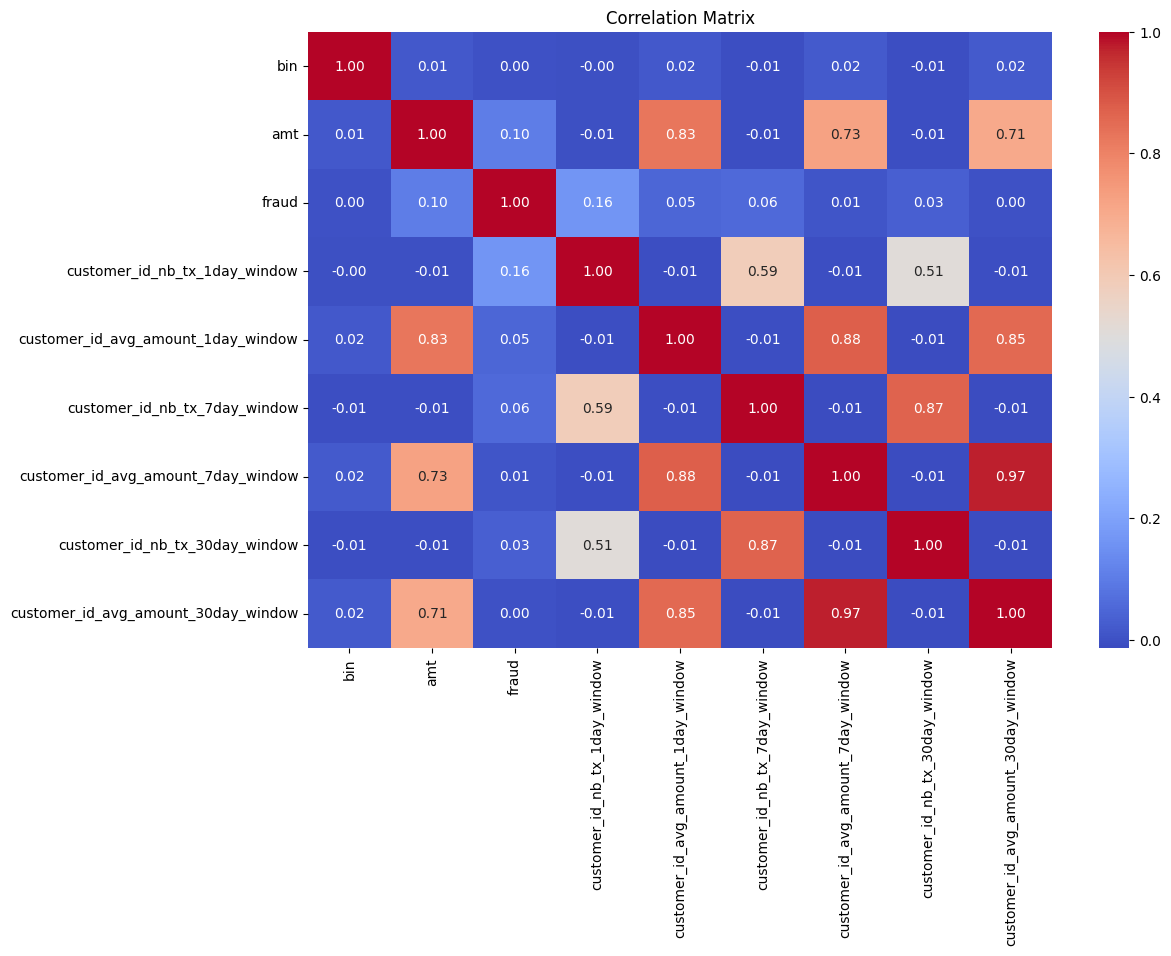

In [5]:

data = transactions_df[transactions_df['post_ts'] > pd.Timestamp("2023-03-01")]

# Separate features (F1, F2, F3) and target (TARGET)
columns =  list(transactions_df.columns)

# Entries you want to remove
entries_to_remove = ['transaction_id', 
                     'customer_id', 'entry_mode',
                     'terminal_id',
                     'fraud_scenario',
                     'post_ts', 
                     'during_weekend', 
                     'during_night',
                     'terminal_id_nb_tx_1day_window', 'terminal_id_risk_1day_window',
                     'terminal_id_nb_tx_7day_window', 'terminal_id_risk_7day_window',
                     'terminal_id_nb_tx_30day_window', 'terminal_id_risk_30day_window'
                     ]  

# Remove the entries
features = [col for col in columns if col not in entries_to_remove]

X = data[features]


# Calculate the correlation matrix
corr_matrix = X.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



## Inter-feature Correlation 

In [ ]:
columns_to_validate = ['customer_id_nb_tx_1day_window',
                        'customer_id_avg_amount_1day_window',
                        'customer_id_nb_tx_7day_window',
                        'customer_id_avg_amount_7day_window',
                        'customer_id_nb_tx_30day_window',
                        'customer_id_avg_amount_30day_window'
                        ]

col_len = len(columns_to_validate)
print(col_len)

# Separate features and target
data = transactions_df[transactions_df['post_ts'] > pd.Timestamp("2023-03-01")]

# Plotting
fig = plt.figure(figsize=(10*col_len, 7*col_len))

ct = 1
for index1, col1 in enumerate(columns_to_validate):
    for index2, col2 in enumerate(columns_to_validate):
        ax1 = fig.add_subplot(col_len, col_len, ct, projection='3d')
        ct = ct + 1

        # Scatter plot
        scatter1 = ax1.scatter(data[col1], data[col2], data['amt'], c=data['fraud'], cmap='coolwarm', marker='o')

        # Labels and title
        ax1.set_xlabel(col1)
        ax1.set_ylabel(col2)
        ax1.set_zlabel('Amount')

# Show plot
plt.title('3D Scatter Plot of Transaction Data')
plt.show()

In [6]:
columns_to_validate = ['customer_id_nb_tx_1day_window',
                        'customer_id_avg_amount_1day_window',
                        'customer_id_nb_tx_7day_window',
                        'customer_id_avg_amount_7day_window',
                        'customer_id_nb_tx_30day_window',
                        'customer_id_avg_amount_30day_window',
                        'amt'
                        ]

col_len = len(columns_to_validate)
print(col_len)

# Separate features and target
data = transactions_df[transactions_df['post_ts'] > pd.Timestamp("2023-03-01")]

# Plotting
fig = plt.figure(figsize=(10*col_len, 7*col_len))

ct = 1
for index1, col1 in enumerate(columns_to_validate):
    for index2, col2 in enumerate(columns_to_validate):
        ax1 = fig.add_subplot(col_len, col_len, ct)
        ct = ct + 1

        # Scatter plot
        scatter1 = ax1.scatter(data[col1], data[col2], c=data['fraud'], cmap='coolwarm', marker='o')

        # Labels and title
        ax1.set_xlabel(col1)
        ax1.set_ylabel(col2)

# Show plot
plt.title('Scatter Plot of Transaction Data')
plt.show()


7


: 

## Principal Component Analysis (PCA)

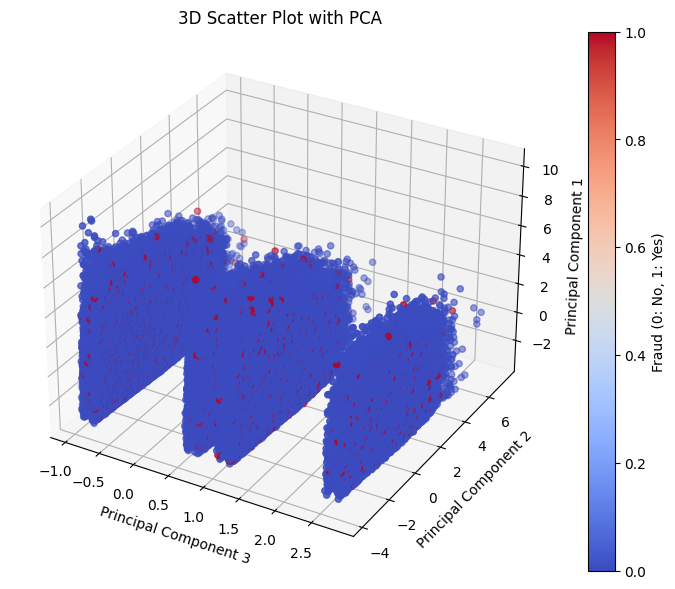

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Separate features and target
data = transactions_df[transactions_df['post_ts'] > pd.Timestamp("2023-03-01")]

# Separate features (F1, F2, F3) and target (TARGET)
columns =  list(transactions_df.columns)

# Entries you want to remove
entries_to_remove = ['transaction_id', 'post_ts',
                     'customer_id', 'entry_mode',
                     'terminal_id', 'fraud',
                     'fraud_scenario',
                     'terminal_id_nb_tx_1day_window', 'terminal_id_risk_1day_window',
                        'terminal_id_nb_tx_7day_window', 'terminal_id_risk_7day_window',
                        'terminal_id_nb_tx_30day_window', 'terminal_id_risk_30day_window']  

# Remove the entries
features = [col for col in columns if col not in entries_to_remove]

X = data[features]
target = 'fraud'
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['fraud'] = y

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC3'], pca_df['PC2'], pca_df['PC1'], c=pca_df['fraud'], cmap='coolwarm', marker='o')
ax.set_xlabel('Principal Component 3')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 1')
plt.title('3D Scatter Plot with PCA')
cbar = plt.colorbar(scatter)
cbar.set_label('Fraud (0: No, 1: Yes)')
plt.show()


In [4]:
# Separate features and target
data = transactions_df[transactions_df['post_ts'] > pd.Timestamp("2023-03-01")]

# Separate features (F1, F2, F3) and target (TARGET)
columns =  list(transactions_df.columns)

# Entries you want to remove
entries_to_remove = ['transaction_id', 'post_ts',
                     'customer_id', 'entry_mode',
                     'terminal_id', 'fraud',
                     'fraud_scenario',
                     'terminal_id_nb_tx_1day_window', 'terminal_id_risk_1day_window',
                        'terminal_id_nb_tx_7day_window', 'terminal_id_risk_7day_window',
                        'terminal_id_nb_tx_30day_window', 'terminal_id_risk_30day_window']  

# Remove the entries
features = [col for col in columns if col not in entries_to_remove]

X = data[features]

# Standardize the features (assuming all are numeric)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratio
print("Explained variance ratio for each principal component:")
print(explained_variance)

# Calculate and print cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:")
print(cumulative_variance)


Explained variance ratio for each principal component:
[0.34889882 0.23206669 0.10015103 0.10001566 0.09977816 0.05518567
 0.0370822  0.01266182 0.01168274 0.00247721]
Cumulative explained variance:
[0.34889882 0.58096552 0.68111655 0.78113221 0.88091037 0.93609603
 0.97317824 0.98584005 0.99752279 1.        ]
